In [12]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
width = 224
length  =224
batch_size = 64
epoch = 20
fill_mode_names = ['nearest' , 'wrap','reflect' ]

In [5]:
# hair removing
# calling preprocess image lib
train_deg = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.25,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode=fill_mode_names[0],
    rescale=1./255.,
)

In [8]:
train_dir="C:/Users/zkzk/Downloads/Faces/Train"
train_data = train_deg.flow_from_directory(
    train_dir ,
    target_size=(width ,length) ,
    class_mode='categorical' ,
    batch_size=batch_size ,
    shuffle=True,
    
)
classes = list(train_data.class_indices.keys())

Found 2190 images belonging to 31 classes.


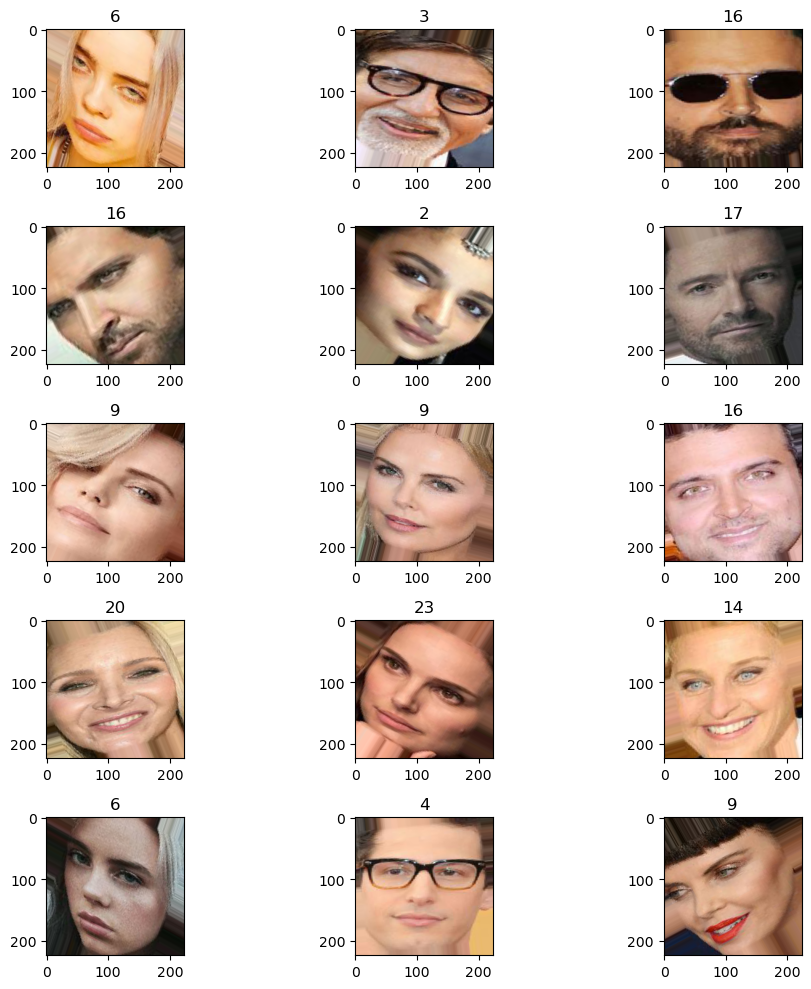

In [13]:
# figure some pics
plt.figure(figsize=(10, 10))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_data:
        image = X_batch[0]
        plt.title(np.argmax(Y_batch[0]))
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [14]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dropout , Dense , GlobalAveragePooling2D ,BatchNormalization
from keras.optimizers import Adam

input_shape = (width, length, 3)
num_classes = len(classes)

In [28]:
inception_model = InceptionV3(weights='imagenet' , include_top = False , input_shape= input_shape)
x = inception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128 , activation = 'relu')(x)
x = BatchNormalization()(x)
predictions = Dense(num_classes , activation='softmax')(x)

In [29]:
model = Model(inputs = inception_model.input , outputs = predictions )
for layer in model.layers:
 layer.trainable = True

In [30]:
# adam = Adam(learning_rate=0.001, ema_momentum=0.99 ,  epsilon=0.1)
model.compile(optimizer='adam' , loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_96 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

 batch_normalization_101 (Batch  (None, 25, 25, 64)  192         ['conv2d_99[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_103 (Batch  (None, 25, 25, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_106 (Batch  (None, 25, 25, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_107 (Batch  (None, 25, 25, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_118 (Batch  (None, 25, 25, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_118[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 25, 25, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_130 (Batch  (None, 12, 12, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_140 (Batch  (None, 12, 12, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_140[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_150[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_151 (Batch  (None, 12, 12, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_151[0][0]']
          

                                                                                                  
 batch_normalization_161 (Batch  (None, 12, 12, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_161[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_166 (Batch  (None, 12, 12, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_170 (Batch  (None, 12, 12, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_172 (Batch  (None, 5, 5, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_174[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_175[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_178[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_179[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_187[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_188[0][0]']
                                                                                                  
 batch_normalization_189 (Batch  (None, 5, 5, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 5, 5, 320)    0           ['batch_normalization_181[0][0]']
                                                                                                  
 mixed9_1 

In [31]:
from keras.callbacks import EarlyStopping , LearningRateScheduler
# Learning rate scheduler
def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 15:
        return 0.0001
    else:
        return 0.0001

# Create a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)


callback = [lr_scheduler]

In [32]:
history = model.fit(train_data,
                  batch_size=batch_size,
                  epochs=epoch,
                  callbacks=callback ,
                  shuffle=True ,
                 )

Epoch 1/20
35/35 [==============================] - 177s 5s/step - loss: 2.7031 - accuracy: 0.2717 - lr: 0.0010
Epoch 2/20
35/35 [==============================] - 160s 5s/step - loss: 1.2300 - accuracy: 0.6342 - lr: 0.0010
Epoch 3/20
35/35 [==============================] - 151s 4s/step - loss: 0.6747 - accuracy: 0.8032 - lr: 0.0010
Epoch 4/20
35/35 [==============================] - 184s 5s/step - loss: 0.5173 - accuracy: 0.8475 - lr: 0.0010
Epoch 5/20
35/35 [==============================] - 257s 7s/step - loss: 0.3855 - accuracy: 0.8973 - lr: 0.0010
Epoch 6/20
35/35 [==============================] - 261s 7s/step - loss: 0.3021 - accuracy: 0.9151 - lr: 0.0010
Epoch 7/20
35/35 [==============================] - 254s 7s/step - loss: 0.1974 - accuracy: 0.9461 - lr: 0.0010
Epoch 8/20
35/35 [==============================] - 254s 7s/step - loss: 0.1982 - accuracy: 0.9457 - lr: 0.0010
Epoch 9/20
35/35 [==============================] - 253s 7s/step - loss: 0.1861 - accuracy: 0.9498 - lr:

1/1 [==============================] - 2s 2s/step
Actual:Tom Cruise


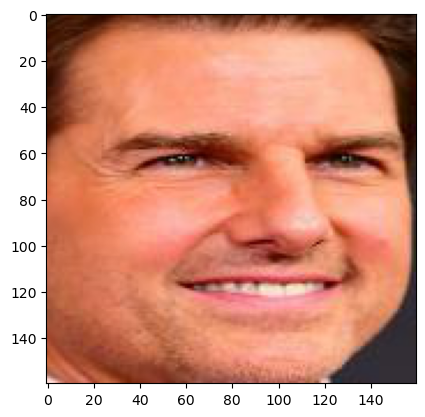

Predicted:  Tom Cruise


In [33]:
from skimage import transform
from PIL import Image as image1
img= "C:/Users/zkzk/Downloads/Faces/test/Tom Cruise/Tom Cruise_0.jpg"
img = image1.open(img)  #read and of iamge
np_img = np.array(img).astype('float32')/255  #convert iamge to array
np_img = transform.resize(np_img , (224,224,3)) # resize iamge and proccessing it
np_img = np.expand_dims(np_img, axis=0)
# img.show()
y_pred = model.predict(np_img)
print("Actual:Tom Cruise")
plt.imshow(img)
plt.show()
print("Predicted: ",classes[np.argmax(y_pred)])

1/1 [==============================] - 0s 85ms/step
Actual:Margot Robbie


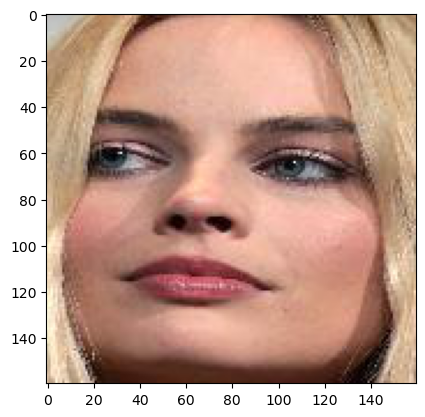

Predicted:  Margot Robbie


In [34]:
img= "C:/Users/zkzk/Downloads/Faces/test/Margot Robbie/Margot Robbie_1.jpg"
img = image1.open(img)  #read and of iamge
np_img = np.array(img).astype('float32')/255  #convert iamge to array
np_img = transform.resize(np_img , (224,224,3)) # resize iamge and proccessing it
np_img = np.expand_dims(np_img, axis=0)
# img.show()
y_pred = model.predict(np_img)
print("Actual:Margot Robbie")
plt.imshow(img)
plt.show()
print("Predicted: ",classes[np.argmax(y_pred)])

1/1 [==============================] - 0s 70ms/step
Actual:Hrithik Roshan


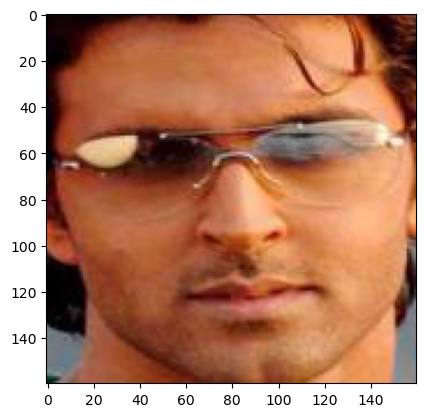

Predicted:  Hrithik Roshan


In [35]:
img= "C:/Users/zkzk/Downloads/Faces/test/Hrithik Roshan/Hrithik Roshan_4.jpg"
img = image1.open(img)  #read and of iamge
np_img = np.array(img).astype('float32')/255  #convert iamge to array
np_img = transform.resize(np_img , (224,224,3)) # resize iamge and proccessing it
np_img = np.expand_dims(np_img, axis=0)
# img.show()
y_pred = model.predict(np_img)
print("Actual:Hrithik Roshan")
plt.imshow(img)
plt.show()
print("Predicted: ",classes[np.argmax(y_pred)])

In [36]:
valid_dir = "C:/Users/zkzk/Downloads/Faces/test"
valid = ImageDataGenerator(rescale=1./255.)
#############
valid_ds = valid.flow_from_directory(valid_dir,target_size=(width, length),batch_size=batch_size,
                                        class_mode='categorical',
                                         shuffle=True,
                                        )

model.evaluate(valid_ds)

Found 372 images belonging to 31 classes.
6/6 [==============================] - 10s 1s/step - loss: 0.1554 - accuracy: 0.9597


[0.15535035729408264, 0.9596773982048035]